# Distance Metrics - Euclidean vs Mahalanobis

In this short notebook, we compare the Euclidean distance metric with the Mahalanobis distance metric among the data points of two different 2D datasets:
- Dataset 1: features covary
- Dataset 2: no covariance

Our goal is to determine the best distance metric function when features have large covariance.

We will see that in dataset 1, due to large covariance between the features, Eluclidean distance metric doesn't provide the true distance between two data points. We have to use the Mahalanobis distance metric.

Mahalanobis distance metric function: 
- Diagonalizes the covariance matrix (features are decorrelated).
- Then, it scales the features.

<img src="https://cse.unl.edu/~hasan/Pics/Mahalanobis.png" width=800, height=400>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import mahalanobis

Data 1:
[[  2  20]
 [  4  40]
 [  6  60]
 [  8  80]
 [ 10 100]]

Data 1 Covariance Matrix:
 [[  10.  100.]
 [ 100. 1000.]]


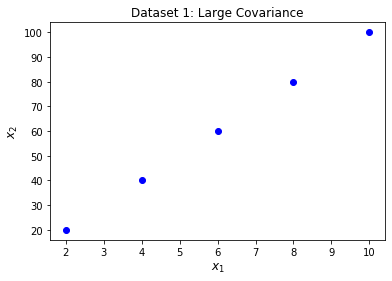


Euclidean Distance: 20.10

Mahalanobis Distance: 638.78

---------------------------------------------------------------------
Data 2:
[[ 2 36]
 [ 4 35]
 [ 6 36]
 [ 8 35]
 [10 36]]
Data 2 Covariance Matrix:
 [[10.   0. ]
 [ 0.   0.3]]


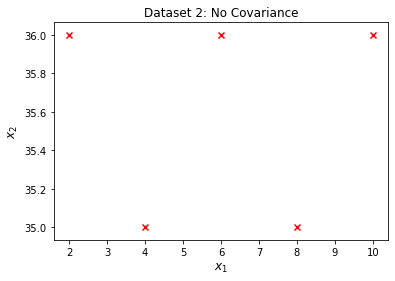


Euclidean Distance: 2.24

Mahalanobis Distance: 6.35


In [3]:
# Dataset 1 (has large covariance)
data1 = np.array([[2, 20], 
                  [4, 40],
                  [6, 60],
                  [8, 80],
                  [10, 100]])

print("Data 1:")
print(data1)
data1_cov = np.cov(data1.T)
print("\nData 1 Covariance Matrix:\n", data1_cov)

plt.figure(figsize = (6, 4))
plt.scatter(data1[:, 0], data1[:, 1], c="b", marker='o')
plt.title("Dataset 1: Large Covariance")
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", rotation=90, fontsize=12)
plt.show()

data1_point_a = data1[0].reshape(1, -1)
data1_point_b = data1[1].reshape(1, -1)


print("\nEuclidean Distance: %.2f" % euclidean_distances(data1_point_a, data1_point_b)[0][0])
print("\nMahalanobis Distance: %.2f" % mahalanobis(data1_point_a, data1_point_b, data1_cov.T))


print("\n---------------------------------------------------------------------")


# Dataset 2 (no covariance)
data2 = np.array([[2, 36], 
                  [4, 35],
                  [6, 36],
                  [8, 35],
                  [10, 36]])

print("Data 2:")
print(data2)
data2_cov = np.cov(data2.T)
print("Data 2 Covariance Matrix:\n", data2_cov)

plt.figure(figsize = (6, 4))
plt.scatter(data2[:, 0], data2[:, 1], c="r", marker='x')
plt.title("Dataset 2: No Covariance")
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", rotation=90, fontsize=12)
plt.show()


data2_point_a = data2[0].reshape(1, -1)
data2_point_b = data2[1].reshape(1, -1)

print("\nEuclidean Distance: %.2f" % euclidean_distances(data2_point_a, data2_point_b)[0][0])
print("\nMahalanobis Distance: %.2f" % mahalanobis(data2_point_a, data2_point_b, data2_cov.T))